In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Milan  = pd.read_csv('../ValoresAtipicosMilan.csv')

In [3]:
# Verificamos información del dataframe
Milan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23705 non-null  int64  
 1   last_scraped                                  23705 non-null  object 
 2   name                                          23705 non-null  object 
 3   host_id                                       23705 non-null  int64  
 4   host_name                                     23705 non-null  object 
 5   host_since                                    23705 non-null  object 
 6   host_response_time                            23705 non-null  object 
 7   host_is_superhost                             23705 non-null  object 
 8   host_identity_verified                        23705 non-null  object 
 9   neighbourhood                                 23705 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Milan['maximum_nights_avg_ntm'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23705 entries, 0 to 23704
Series name: maximum_nights_avg_ntm
Non-Null Count  Dtype  
--------------  -----  
23705 non-null  float64
dtypes: float64(1)
memory usage: 185.3 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Milan['maximum_nights_avg_ntm'].max()
Min = Milan['maximum_nights_avg_ntm'].min()
Limites = [Min, Max]
Limites

[1.0, 1128.4]

In [6]:
# Calculamos el rango R
R = Max - Min
R

1127.4

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 23706

ni = 1 + 3.32 * np.log10(n)
ni

15.524529489816098

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

72.620558371161

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (1, 1128, 16)
intervalos

array([1.00000000e+00, 7.61333333e+01, 1.51266667e+02, 2.26400000e+02,
       3.01533333e+02, 3.76666667e+02, 4.51800000e+02, 5.26933333e+02,
       6.02066667e+02, 6.77200000e+02, 7.52333333e+02, 8.27466667e+02,
       9.02600000e+02, 9.77733333e+02, 1.05286667e+03, 1.12800000e+03])

In [10]:
# Creamos las categorías
categorias = [
    "Una noche",
    "Estancia corta",
    "Estancia breve",
    "Estancia estándar",
    "Estancia moderada",
    "Estancia prolongada",
    "Estancia larga",
    "Estancia muy larga",
    "Estancia extendida",
    "Estancia excepcional",
    "Estancia duradera",
    "Estancia extensiva",
    "Estancia prolongada máxima",
    "Estancia de larga duración",
    "Estancia ilimitada"
]


In [12]:
# Creamos las ctegorias en la columna numerica
Milan['maximum_nights_avg_ntm'] = pd.cut ( x = Milan ['maximum_nights_avg_ntm'], bins = intervalos, labels = categorias )
Milan['maximum_nights_avg_ntm']

0                   Una noche
1        Estancia excepcional
2              Estancia corta
3        Estancia excepcional
4                   Una noche
                 ...         
23700               Una noche
23701       Estancia estándar
23702       Estancia estándar
23703       Estancia estándar
23704       Estancia estándar
Name: maximum_nights_avg_ntm, Length: 23705, dtype: category
Categories (15, object): ['Una noche' < 'Estancia corta' < 'Estancia breve' < 'Estancia estándar' ... 'Estancia extensiva' < 'Estancia prolongada máxima' < 'Estancia de larga duración' < 'Estancia ilimitada']

In [13]:
table1 = freq_tbl(Milan['maximum_nights_avg_ntm'])
table1

,maximum_nights_avg_ntm,frequency,percentage,cumulative_perc
0,Una noche,7233,0.305126,0.305370
1,Estancia ilimitada,7169,0.302426,0.608039
2,Estancia moderada,6302,0.265851,0.874103
3,Estancia corta,985,0.041552,0.915689
4,Estancia de larga duración,579,0.024425,0.940133
5,Estancia breve,442,0.018646,0.958794
6,Estancia excepcional,246,0.010378,0.969180
7,Estancia estándar,167,0.007045,0.976231
8,Estancia prolongada,126,0.005315,0.981550
9,Estancia muy larga,126,0.005315,0.986870


In [14]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,maximum_nights_avg_ntm,frequency
0,Una noche,7233
1,Estancia ilimitada,7169
2,Estancia moderada,6302
3,Estancia corta,985
4,Estancia de larga duración,579
5,Estancia breve,442
6,Estancia excepcional,246
7,Estancia estándar,167
8,Estancia prolongada,126
9,Estancia muy larga,126


In [15]:
# Obtener un filtro de los valores más relevantes de las vaiables categóricas seleccionadas

Filtro = table2[ table2['frequency'] > 1]
Filtro

,maximum_nights_avg_ntm,frequency
0,Una noche,7233
1,Estancia ilimitada,7169
2,Estancia moderada,6302
3,Estancia corta,985
4,Estancia de larga duración,579
5,Estancia breve,442
6,Estancia excepcional,246
7,Estancia estándar,167
8,Estancia prolongada,126
9,Estancia muy larga,126


In [16]:
# Ajusto el indice de mi data frame

Filtro_index = Filtro.set_index('maximum_nights_avg_ntm')
Filtro_index

,frequency
maximum_nights_avg_ntm,
Una noche,7233
Estancia ilimitada,7169
Estancia moderada,6302
Estancia corta,985
Estancia de larga duración,579
Estancia breve,442
Estancia excepcional,246
Estancia estándar,167
Estancia prolongada,126


Text(0, 0.5, 'Frecuencia')

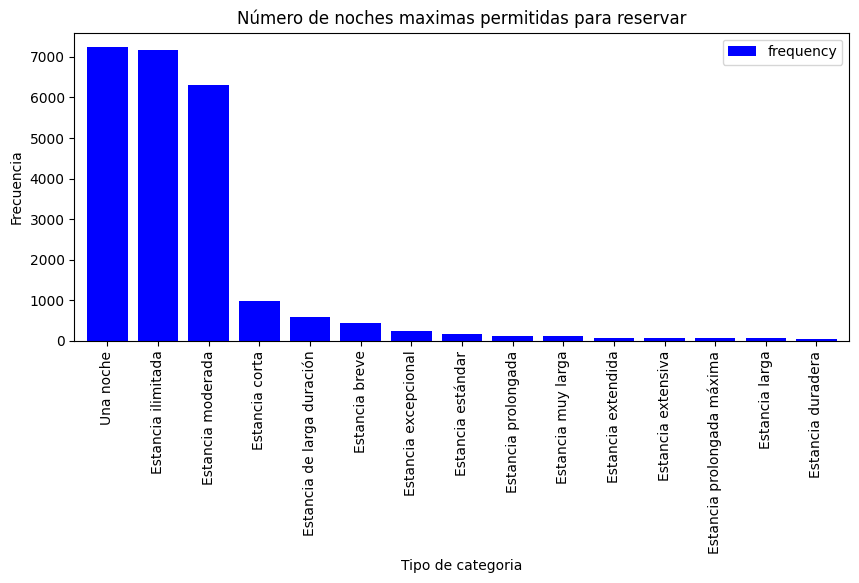

In [17]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Número de noches maximas permitidas para reservar')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')